In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('House_prediction_dataset/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

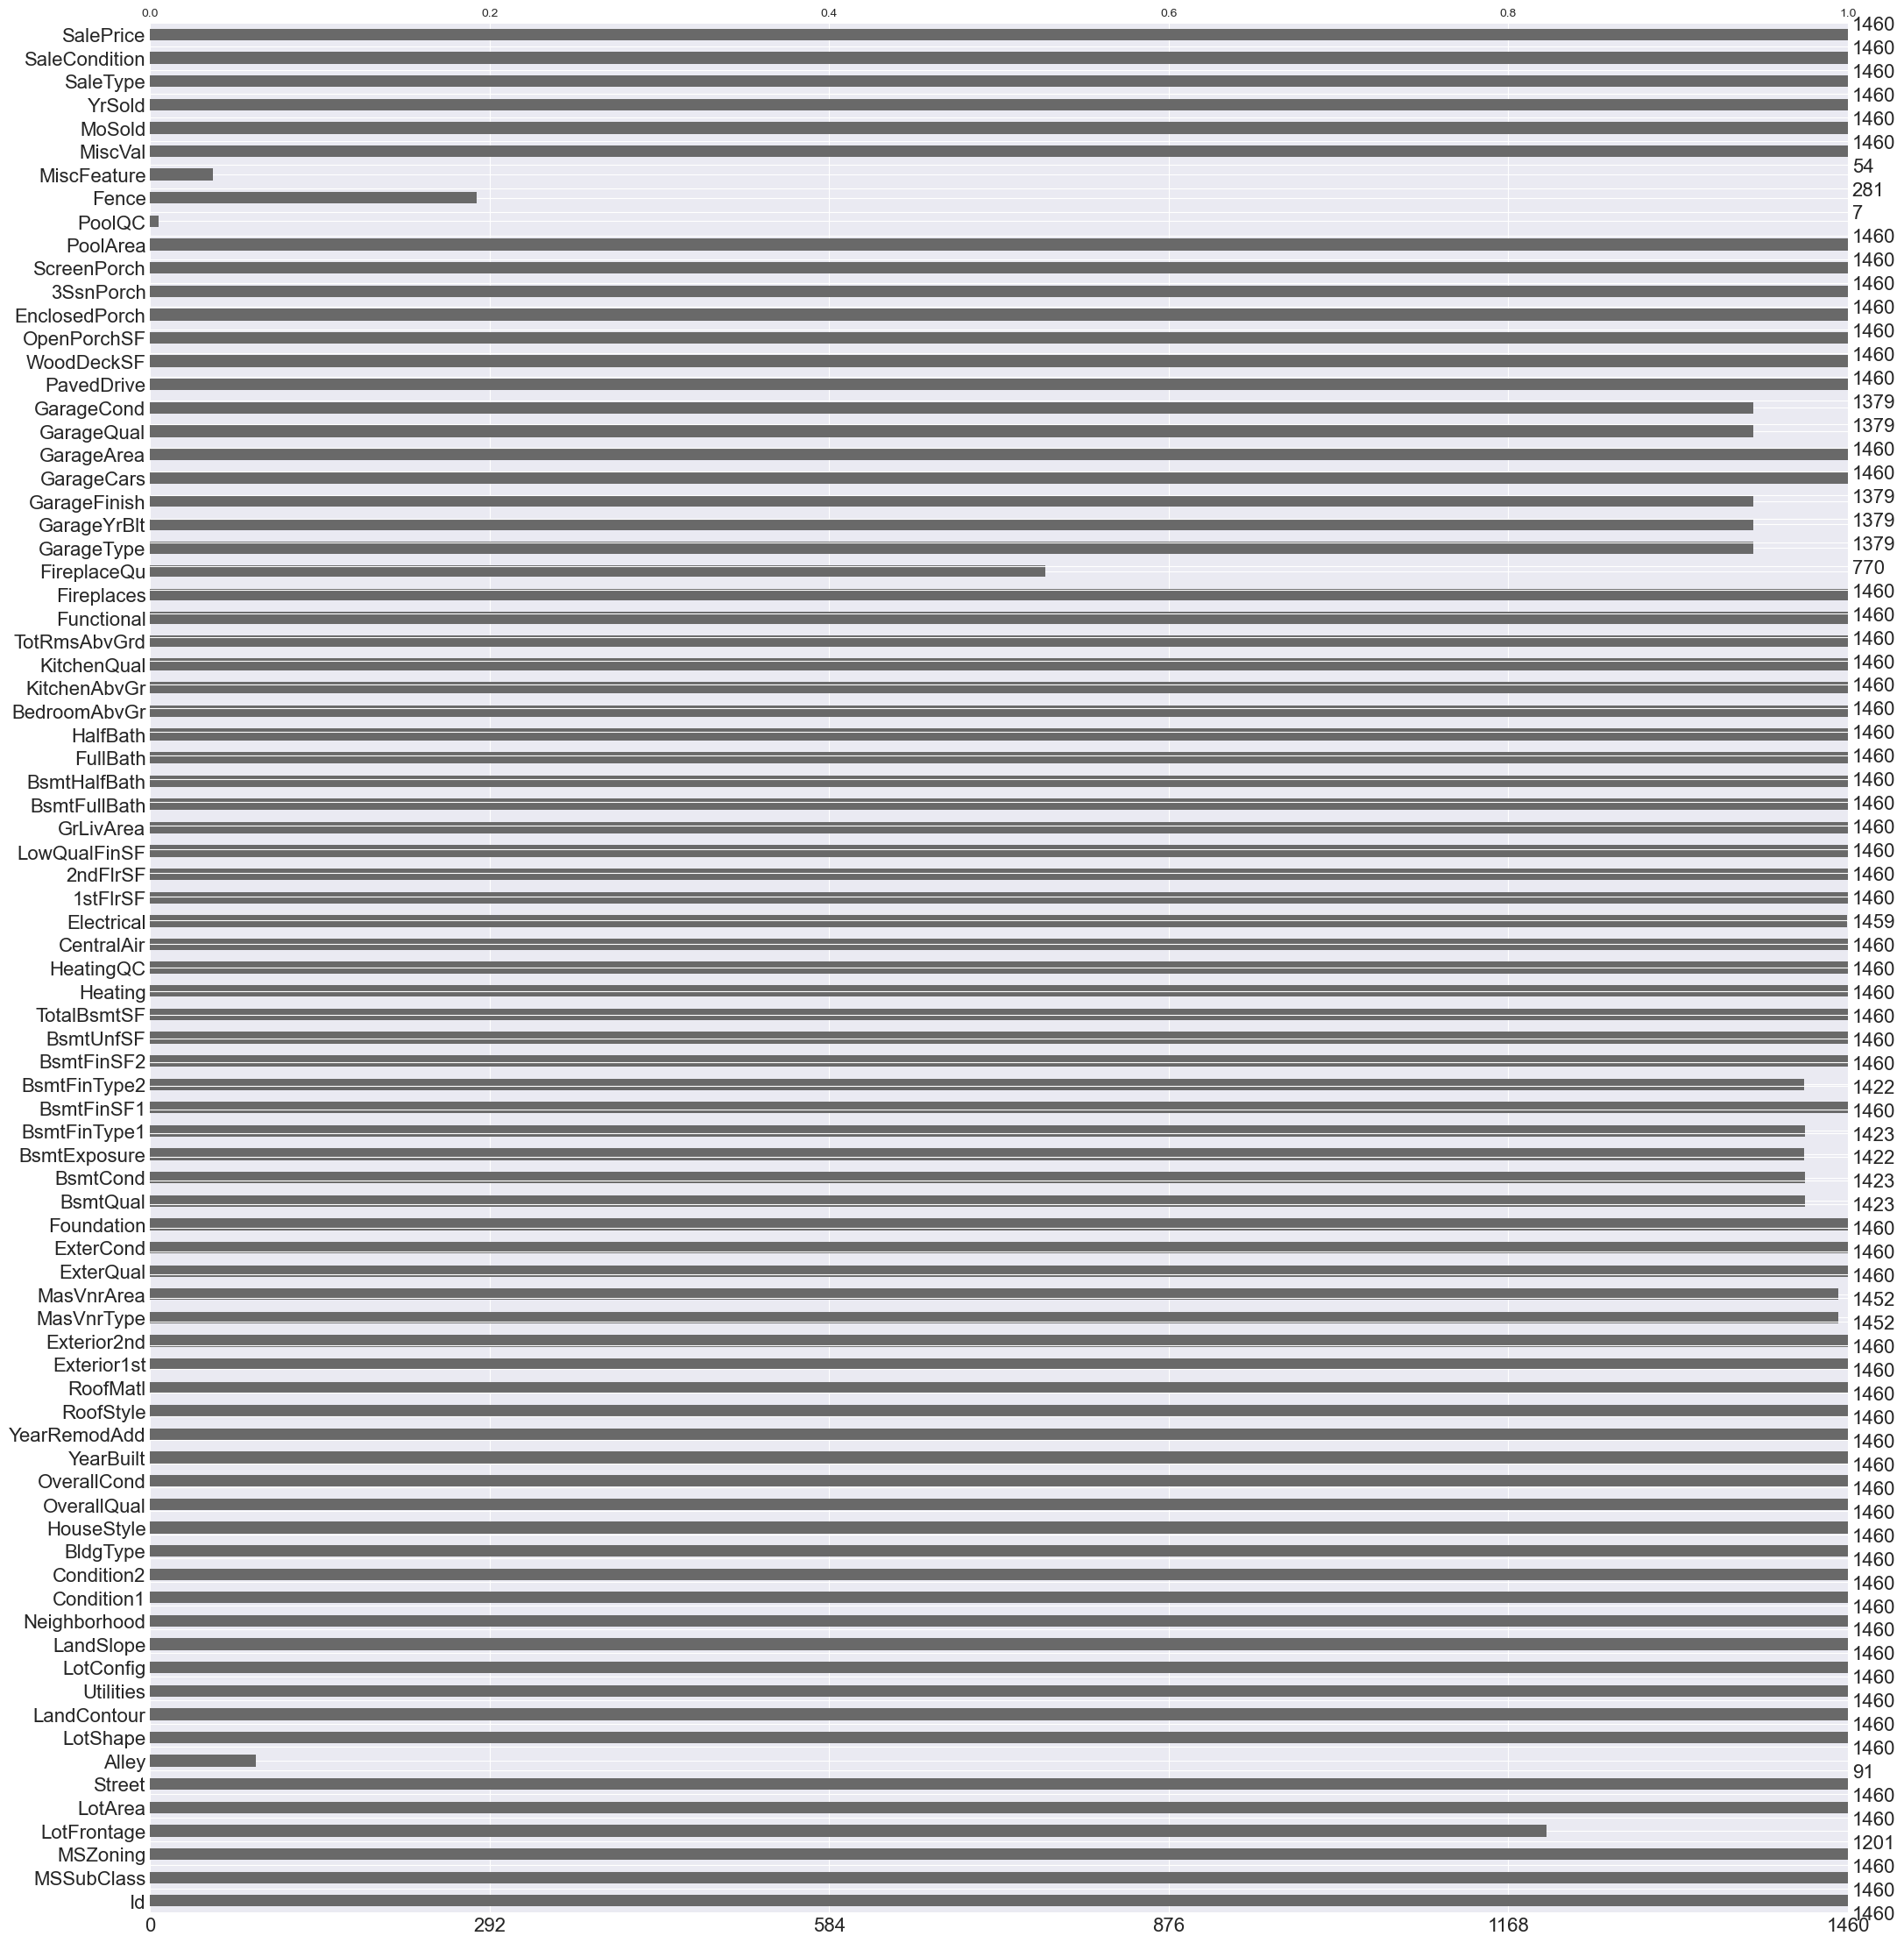

In [3]:
msno.bar(df)

#### I would consider dropping the attributes with more than 40% of missing values

In [4]:
df = df.drop("Alley", axis='columns')
df = df.drop("MiscFeature", axis='columns')
df = df.drop("FireplaceQu", axis='columns')
df = df.drop("Fence", axis='columns')
df = df.drop("PoolQC", axis='columns')


df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


<AxesSubplot:>

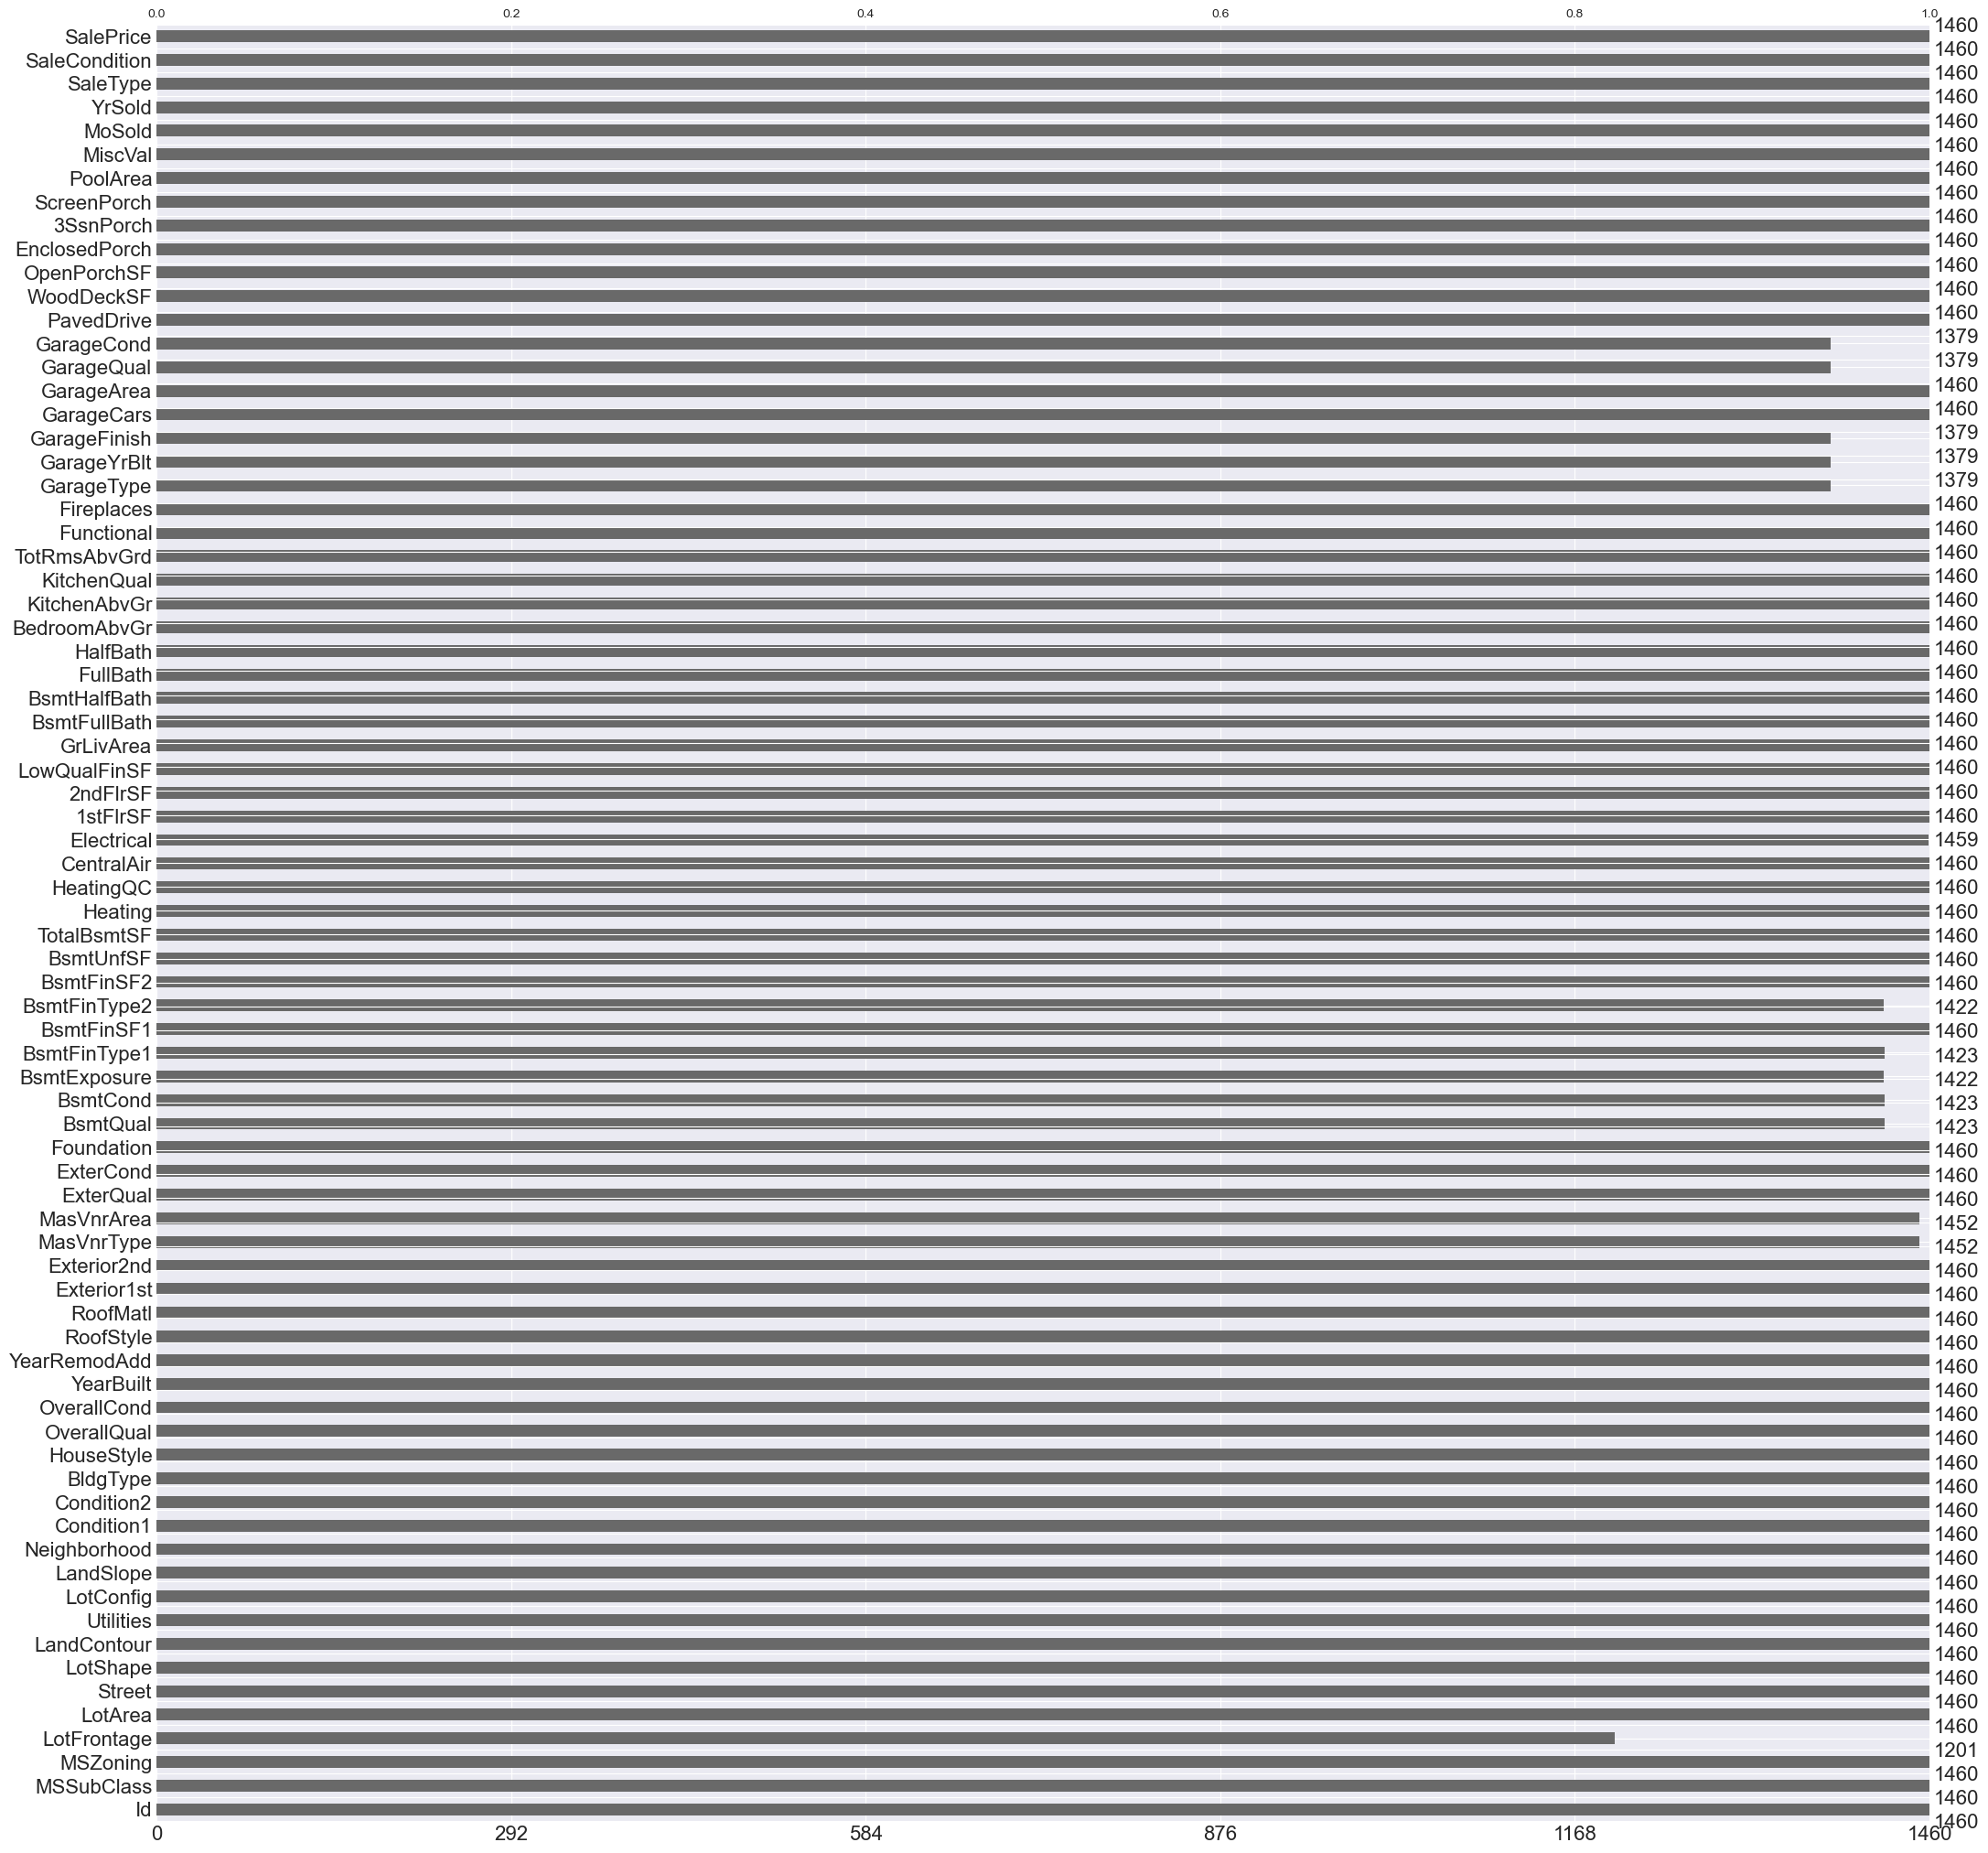

In [5]:
msno.bar(df)

#### Drop nan rows

In [6]:
df = df.dropna()

<AxesSubplot:>

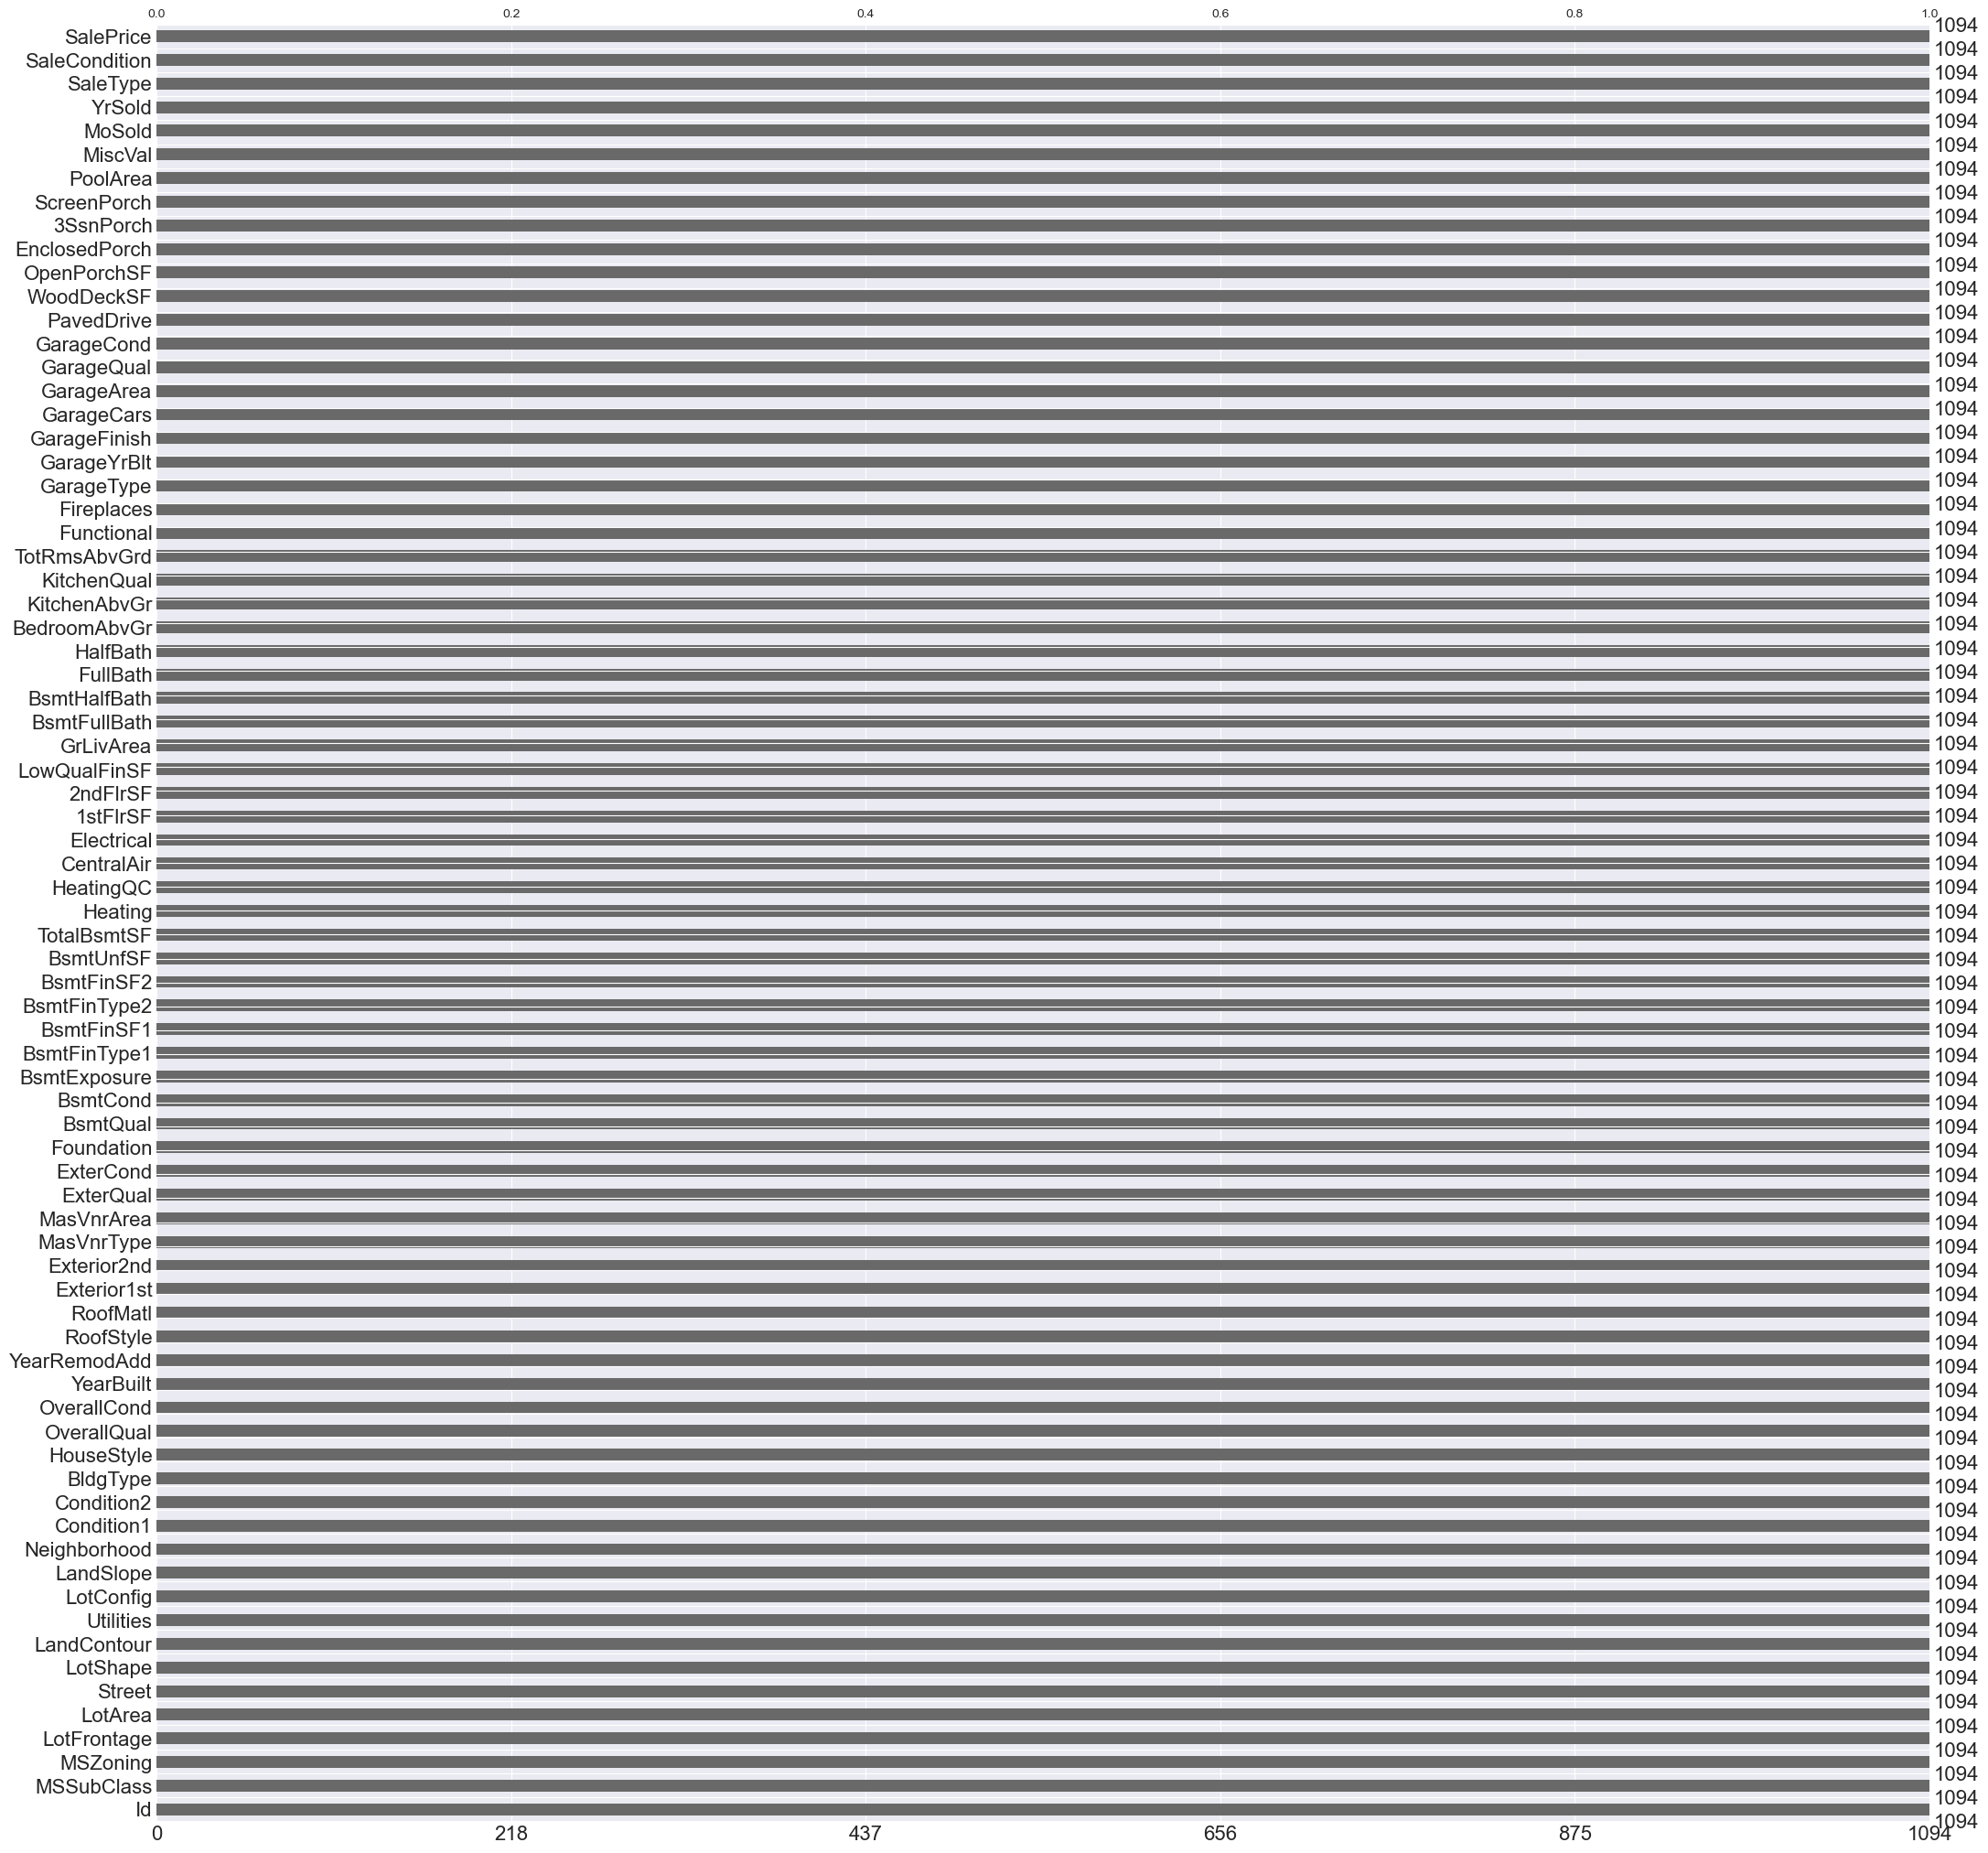

In [7]:
msno.bar(df)

In [8]:
# spearson
# pairplot

In [9]:
def add_att(corr,nu = False,od = False):
    att = []
    num = []
    od = []
    for index, val in corr.iteritems():
        if(index == 'SalePrice'):
            continue 
        att.append(index)
        if(nu):
            num.append(index)
        if(od):
            od.append(index)
    
    return att, num, od


In [10]:
def ord_enc(ordnial):
    enc = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po','NA']])

    ordnial['ExterQual'] = enc.fit_transform(ordnial.loc[:,['ExterQual']])
    ordnial['ExterCond'] = enc.fit_transform(ordnial.loc[:,['ExterCond']])
    ordnial['BsmtQual'] = enc.fit_transform(ordnial.loc[:,['BsmtQual']])
    ordnial['BsmtCond'] = enc.fit_transform(ordnial.loc[:,['BsmtCond']])
    ordnial['HeatingQC'] = enc.fit_transform(ordnial.loc[:,['HeatingQC']])
    ordnial['KitchenQual'] = enc.fit_transform(ordnial.loc[:,['KitchenQual']])
    ordnial['GarageQual'] = enc.fit_transform(ordnial.loc[:,['GarageQual']])
    ordnial['GarageCond'] = enc.fit_transform(ordnial.loc[:,['GarageCond']])

    enc = OrdinalEncoder(categories=[['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA']])
    ordnial['BsmtFinType1'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType1']])
    ordnial['BsmtFinType2'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType2']])

    enc = OrdinalEncoder(categories=[['Gd','Av','Mn','No','NA']])
    ordnial['BsmtExposure'] = enc.fit_transform(ordnial.loc[:,['BsmtExposure']])
    return ordnial

#### correlation between Numerical values

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = df.select_dtypes(include=numerics)

# ['Id','MSSubClass','OverallQual','OverallCond']
# They have numerical data type but they dont represent numerial value 
numeric = numeric.drop(columns=['Id','MSSubClass','OverallQual','OverallCond'])
numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


YearBuilt       0.523434
YearRemodAdd    0.519806
MasVnrArea      0.485409
TotalBsmtSF     0.617741
1stFlrSF        0.617692
GrLivArea       0.707481
FullBath        0.578299
TotRmsAbvGrd    0.560521
Fireplaces      0.458182
GarageYrBlt     0.502248
GarageCars      0.652103
GarageArea      0.620772
SalePrice       1.000000
Name: SalePrice, dtype: float64

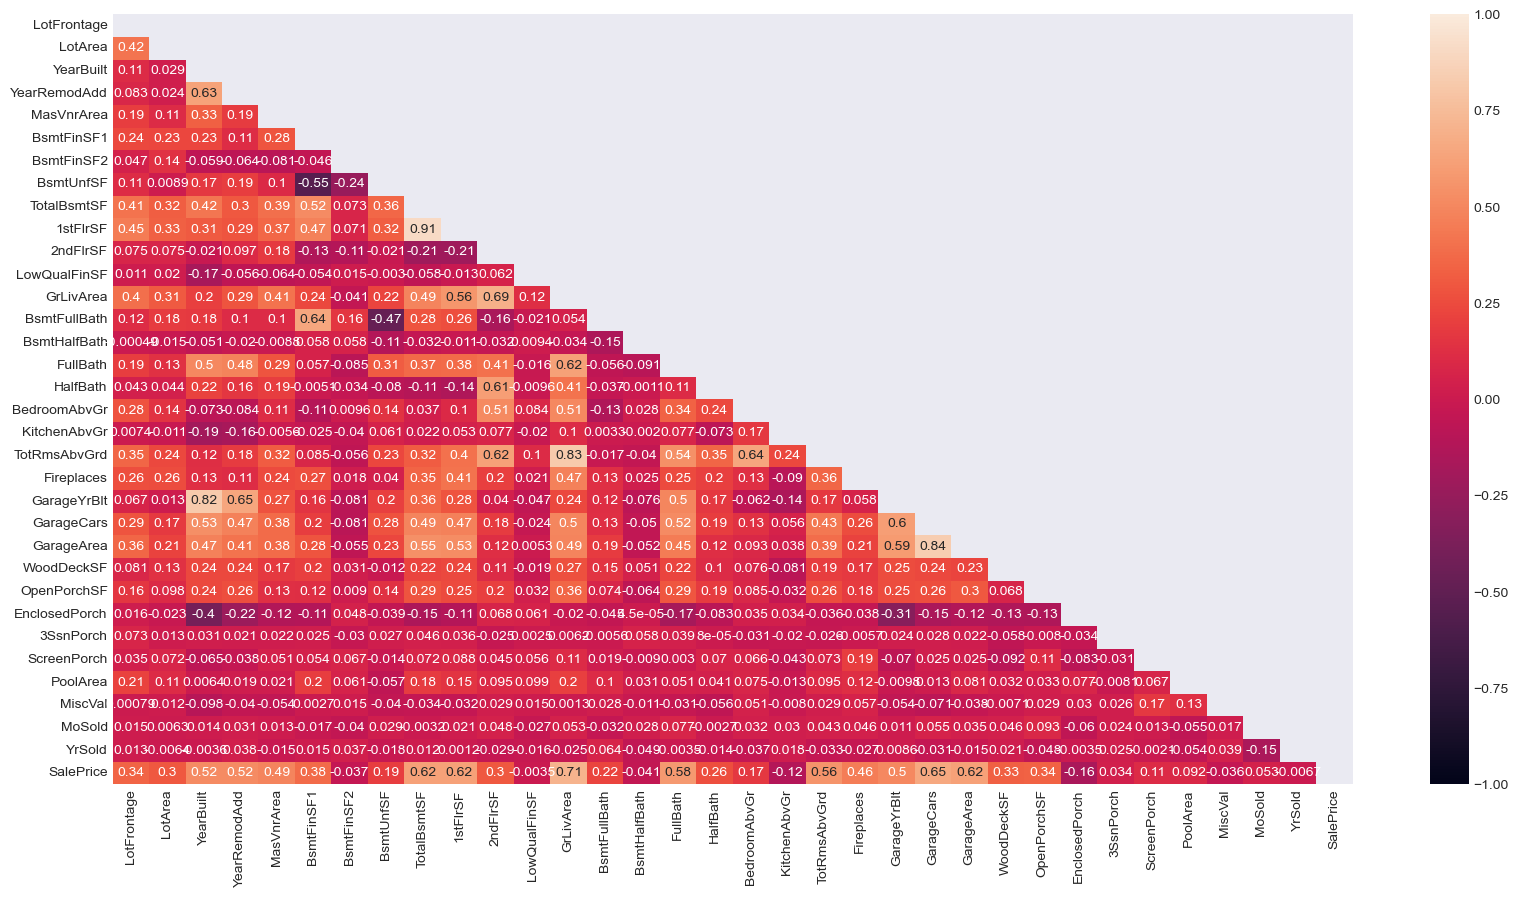

In [12]:

corr_num= numeric.corr()
matrix = np.triu(corr_num)

plt.figure(figsize=(20,10))
heatmap = sns.heatmap(corr_num, vmin=-1, 
                  vmax=1, annot=True,mask=matrix)
corr_num = corr_num.loc[(corr_num['SalePrice'] > 0.4) | (corr_num['SalePrice'] < -0.4)]
corr_num = corr_num['SalePrice']
corr_num

In [13]:
attributes = []
num = []
att, nu,_ = add_att(corr_num,nu = True)
attributes.extend(att)
num.extend(nu)
print(attributes)

['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']


#### To reduce dimentionality even further, from the selected numerical attributes, chose the highly correlated attributes between each other (redundency)

In [14]:
attributes.remove('GarageYrBlt')
attributes.remove('TotRmsAbvGrd')
attributes.remove('GarageArea')
num.remove('GarageYrBlt')
num.remove('TotRmsAbvGrd')
num.remove('GarageArea')


In [15]:
attributes


['YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'Fireplaces',
 'GarageCars']

#### correlation between Ordinal 

In [16]:
to_exclude = list(numeric.columns.values)
ordnial = df.drop(columns=to_exclude)
ordnial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1094 non-null   int64 
 1   MSSubClass     1094 non-null   int64 
 2   MSZoning       1094 non-null   object
 3   Street         1094 non-null   object
 4   LotShape       1094 non-null   object
 5   LandContour    1094 non-null   object
 6   Utilities      1094 non-null   object
 7   LotConfig      1094 non-null   object
 8   LandSlope      1094 non-null   object
 9   Neighborhood   1094 non-null   object
 10  Condition1     1094 non-null   object
 11  Condition2     1094 non-null   object
 12  BldgType       1094 non-null   object
 13  HouseStyle     1094 non-null   object
 14  OverallQual    1094 non-null   int64 
 15  OverallCond    1094 non-null   int64 
 16  RoofStyle      1094 non-null   object
 17  RoofMatl       1094 non-null   object
 18  Exterior1st    1094 non-null

#### Ordinal Encoding of the features 
#### Order was explicilty specified to ensure and force order

In [17]:

ordnial = ord_enc(ordnial)

In [18]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
ordnial = ordnial.select_dtypes(include=numerics)
ordnial = ordnial.drop(columns=['Id','MSSubClass'])
ordnial["SalePrice"] = df['SalePrice']
ordnial.head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice
0,7,5,1.0,2.0,1.0,2.0,3.0,0.0,5.0,0.0,1.0,2.0,2.0,208500
1,6,8,2.0,2.0,1.0,2.0,0.0,1.0,5.0,0.0,2.0,2.0,2.0,181500
2,7,5,1.0,2.0,1.0,2.0,2.0,0.0,5.0,0.0,1.0,2.0,2.0,223500
3,7,5,2.0,2.0,2.0,1.0,3.0,1.0,5.0,1.0,1.0,2.0,2.0,140000
4,8,5,1.0,2.0,1.0,2.0,1.0,0.0,5.0,0.0,1.0,2.0,2.0,250000


In [19]:
ordnial["SalePrice"] = df['SalePrice']


OverallQual    0.823469
ExterQual     -0.709876
BsmtQual      -0.709636
HeatingQC     -0.527768
KitchenQual   -0.690277
SalePrice      1.000000
Name: SalePrice, dtype: float64

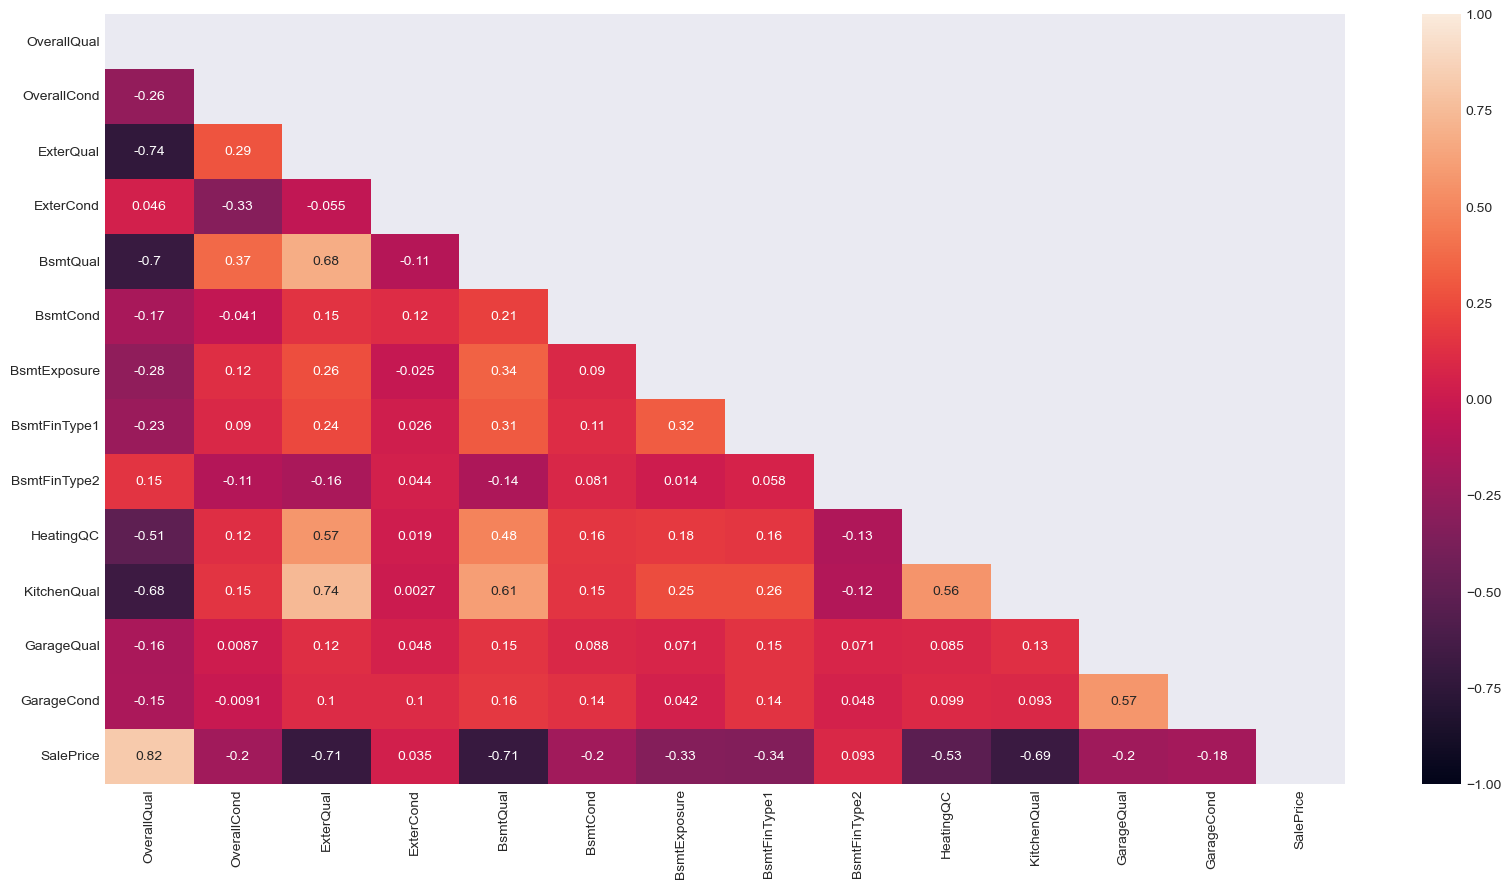

In [20]:
corr_ord= ordnial.corr(method='spearman')
matrix = np.triu(corr_ord)

plt.figure(figsize=(20,10))
heatmap = sns.heatmap(corr_ord, vmin=-1, 
                  vmax=1, annot=True,mask=matrix)
corr_ord = corr_ord.loc[(corr_ord['SalePrice'] > 0.4) | (corr_ord['SalePrice'] < -0.4)]
corr_ord = corr_ord['SalePrice']
corr_ord

In [21]:
od = []
att, _ , od =  add_att(corr_ord,od = True)  
attributes.extend(att)
od.extend(od)
print(attributes)

['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageCars', 'OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']


In [22]:
df[od] = ordnial[od]


#### Select attributes with at least 0.5 correlation coefficient (or less than -0.5)

In [23]:
cat = df
to_exclude = list(numeric.columns.values)
tmp = list(ordnial.drop(columns=['SalePrice']).columns.values)
cat = cat.drop(columns=to_exclude)
cat = cat.drop(columns=tmp)
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1094 non-null   int64 
 1   MSSubClass     1094 non-null   int64 
 2   MSZoning       1094 non-null   object
 3   Street         1094 non-null   object
 4   LotShape       1094 non-null   object
 5   LandContour    1094 non-null   object
 6   Utilities      1094 non-null   object
 7   LotConfig      1094 non-null   object
 8   LandSlope      1094 non-null   object
 9   Neighborhood   1094 non-null   object
 10  Condition1     1094 non-null   object
 11  Condition2     1094 non-null   object
 12  BldgType       1094 non-null   object
 13  HouseStyle     1094 non-null   object
 14  RoofStyle      1094 non-null   object
 15  RoofMatl       1094 non-null   object
 16  Exterior1st    1094 non-null   object
 17  Exterior2nd    1094 non-null   object
 18  MasVnrType     1094 non-null

In [24]:
cat["SalePrice"] = df['SalePrice']


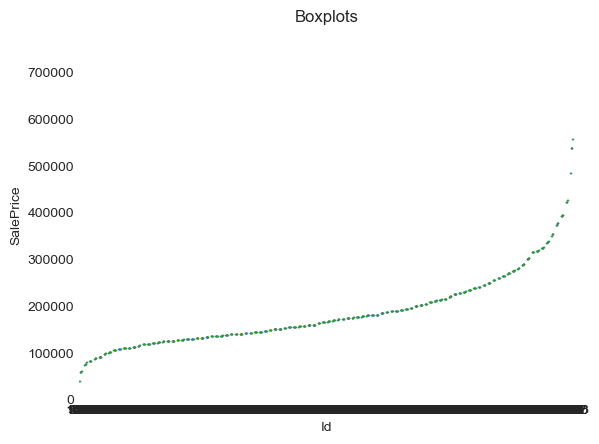

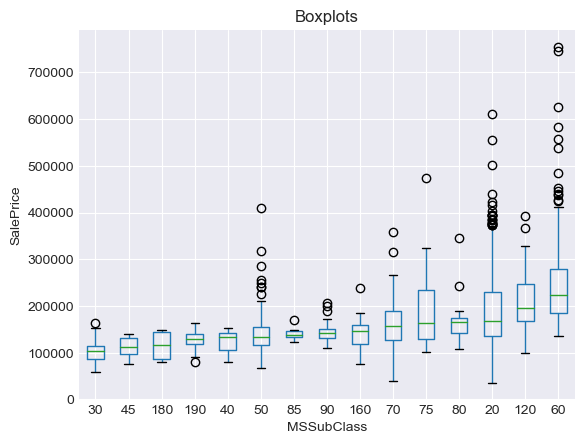

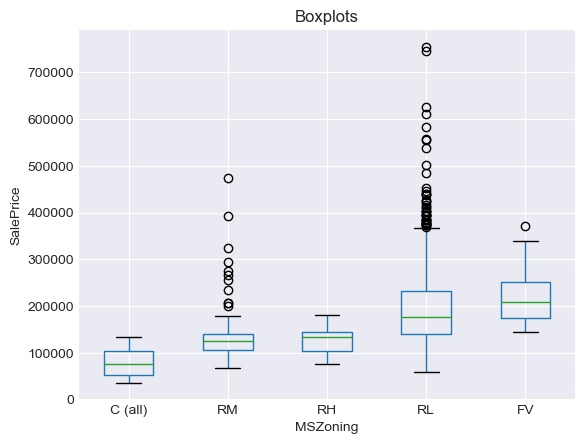

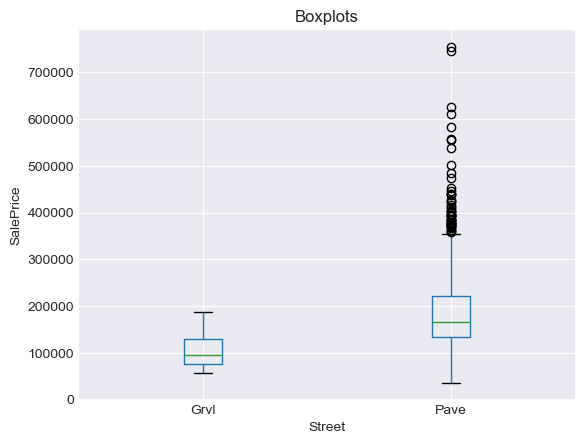

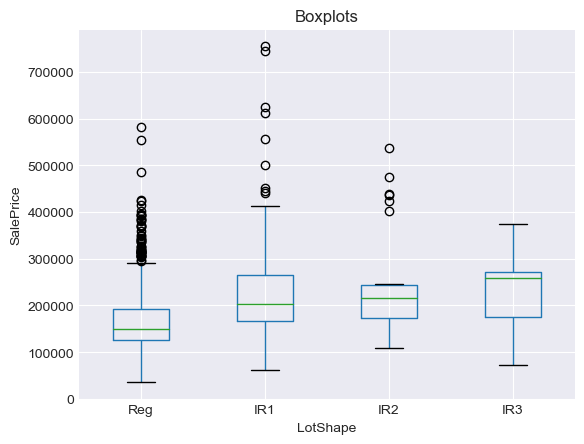

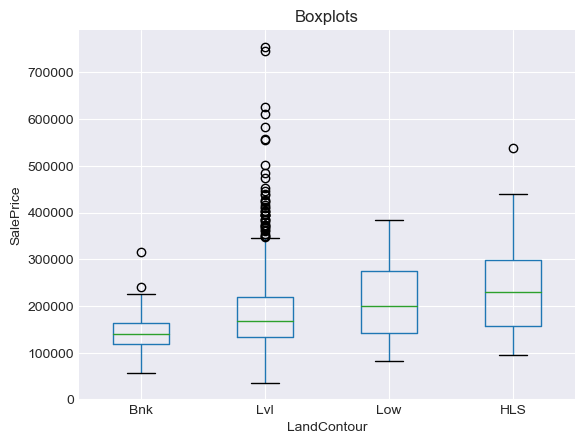

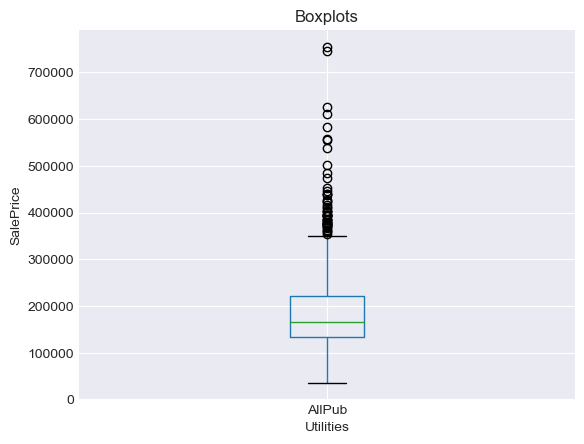

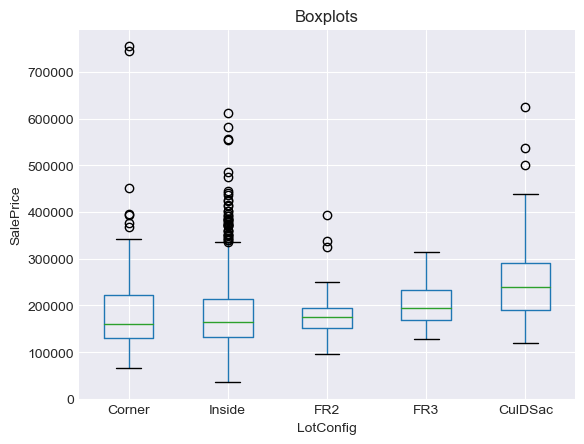

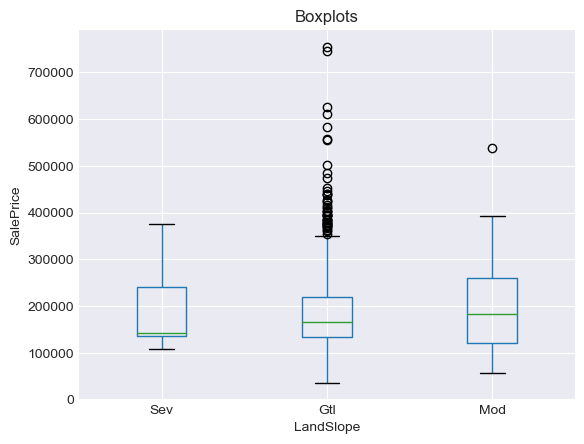

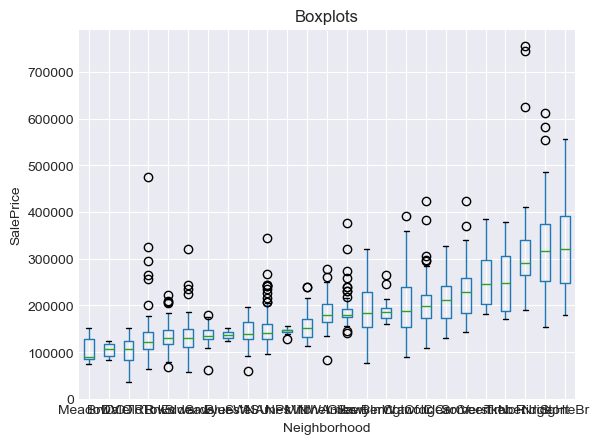

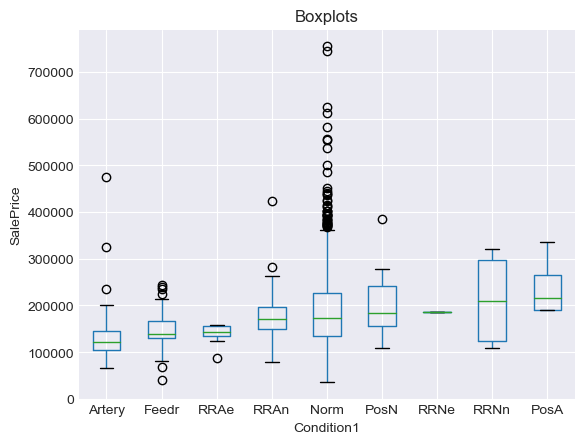

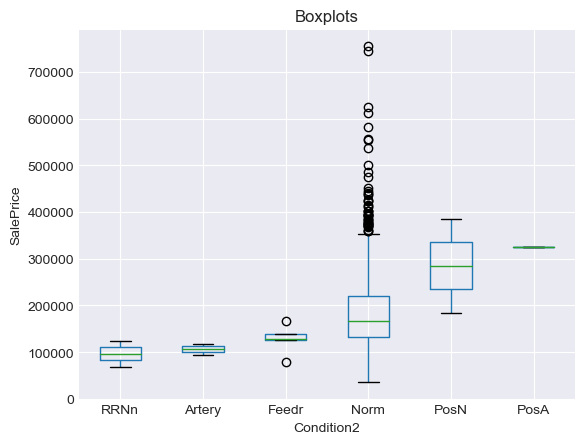

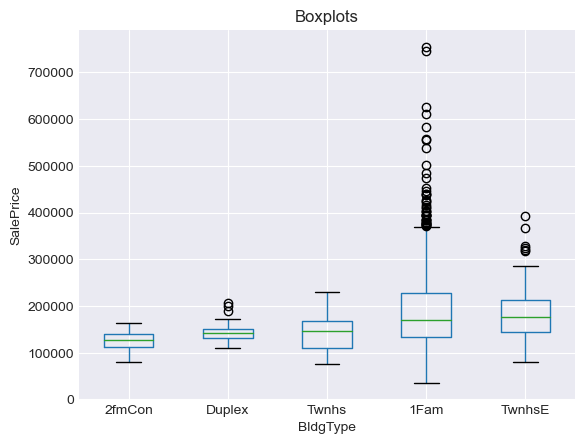

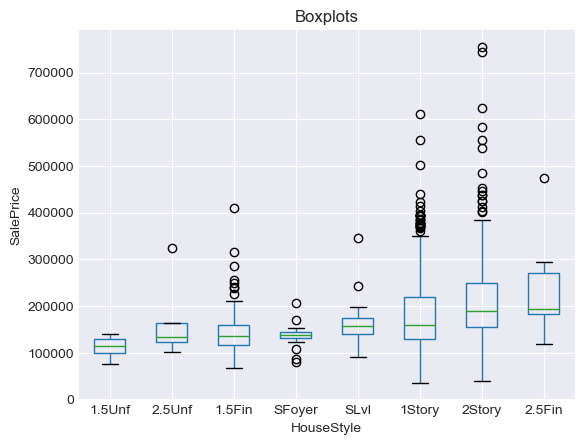

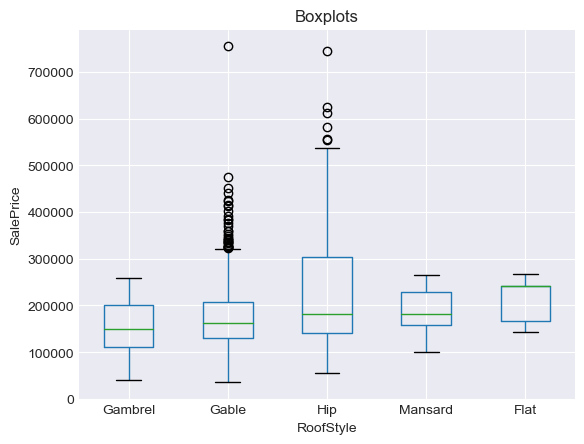

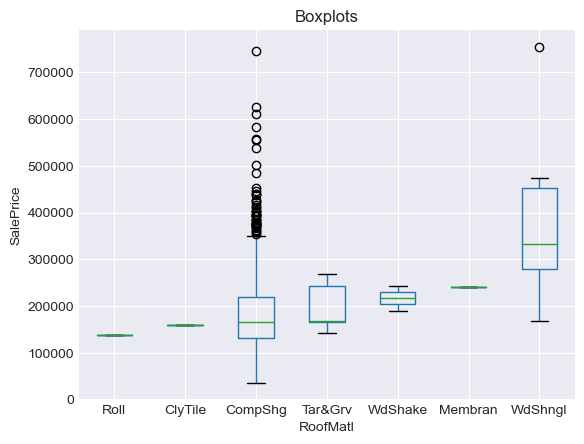

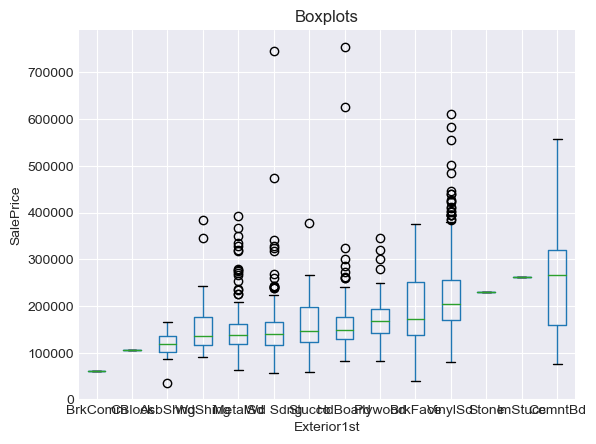

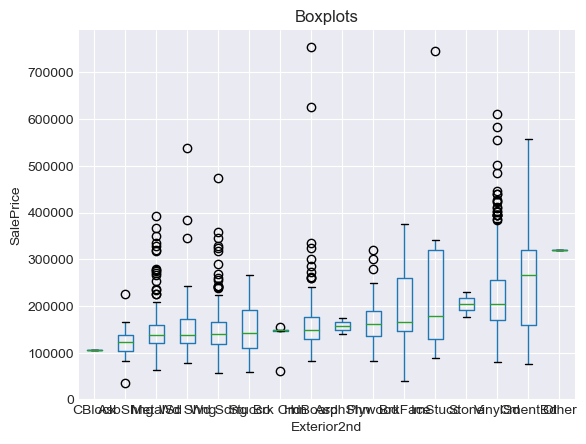

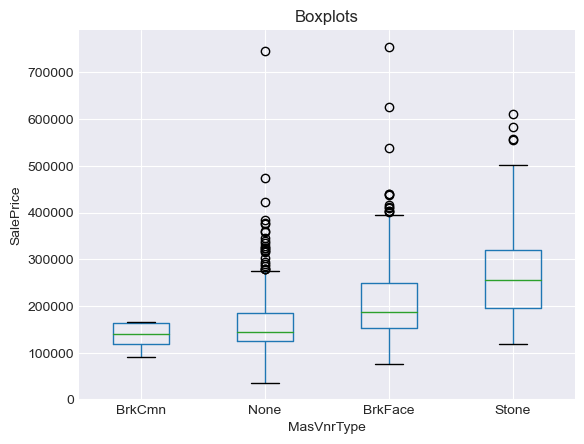

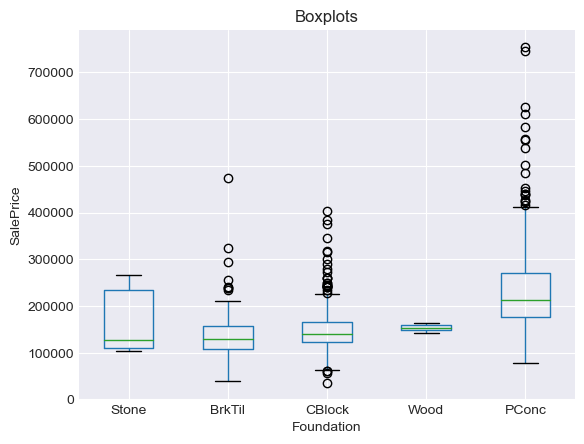

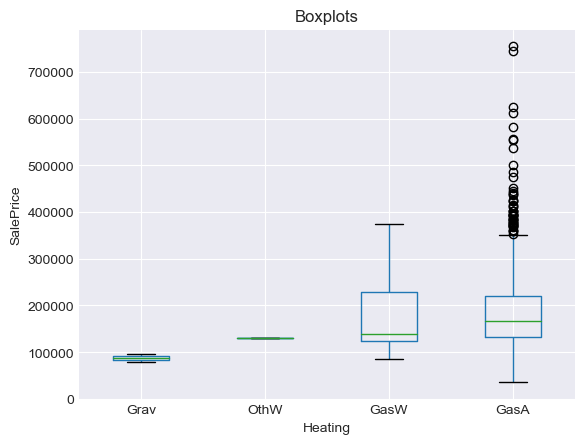

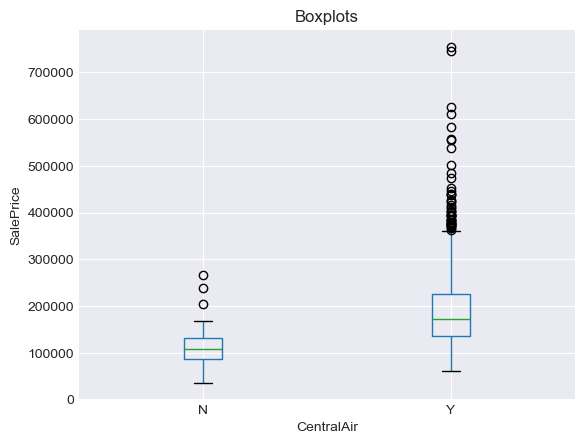

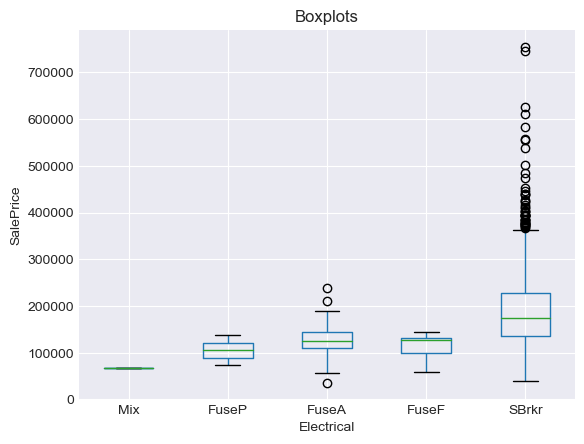

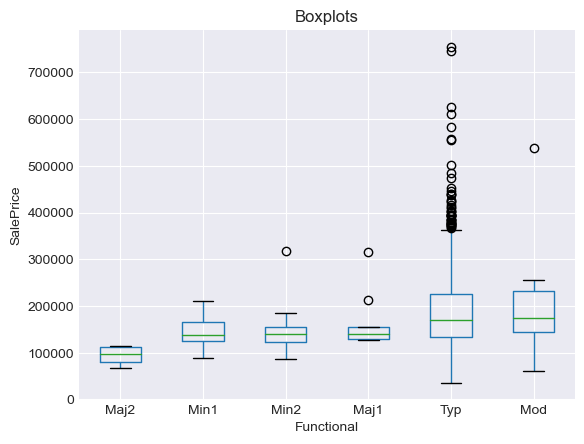

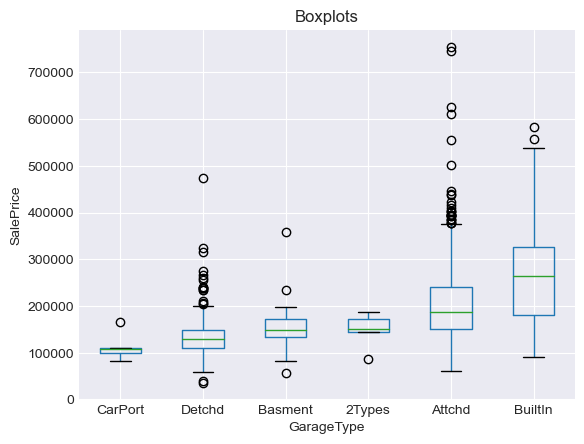

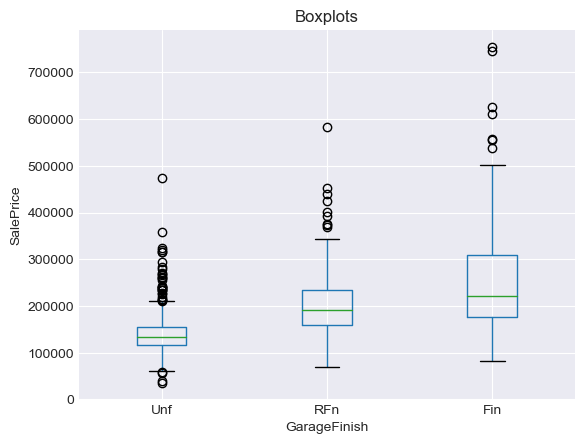

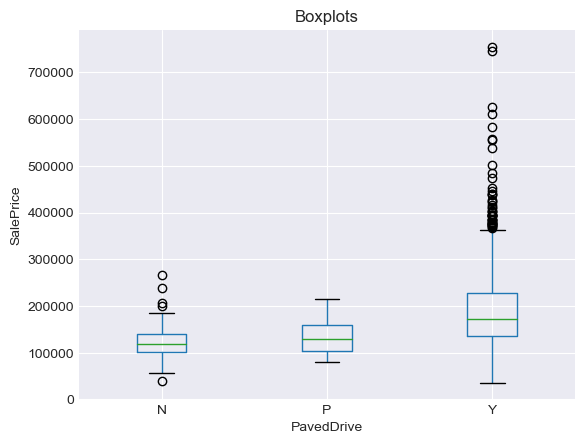

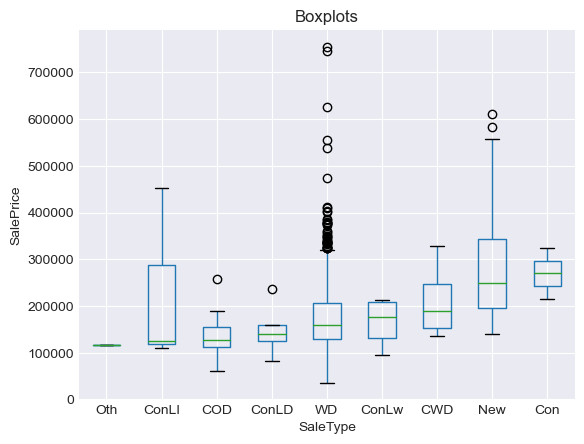

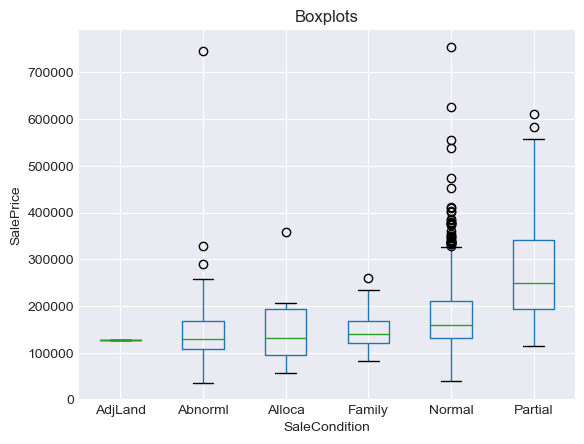

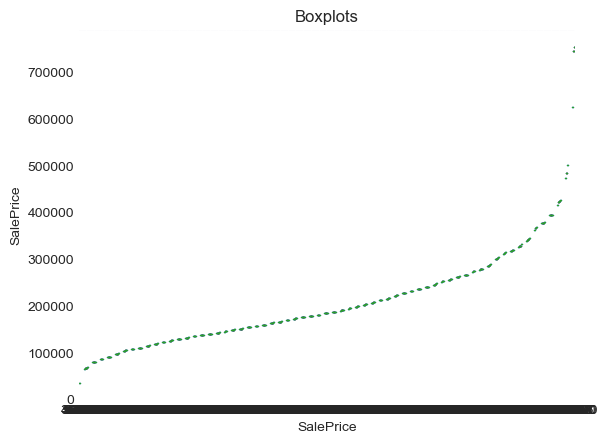

In [25]:
def boxplot_sorted(df, by, column, rot=0):

    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()

    return df2[meds.index].boxplot(rot=rot, return_type="axes")

for name, values in cat.iteritems():
    axes = boxplot_sorted(cat,  by=name, column='SalePrice', rot=0)
    plt.xlabel(name)
    plt.ylabel('SalePrice')
    plt.title('Boxplots')
    plt.show()


#### For the categorical attributes, It was examined by eye based on the boxplot of the possible values for each and every attribute 

#### After the investigation, here are the attributes

- MSZoning
- Street
- Neighborhood
- Condition2
- RoofMatl
- CentralAir
- GarageFinish

In [26]:
attributes.extend(['MSZoning','Street','Neighborhood','Condition2','RoofMatl','CentralAir','GarageFinish'])


len(attributes)

21

#### Now we have the list of attributes that we selected

In [27]:
X = df[attributes]
Y = df['SalePrice']


In [28]:
scaler = StandardScaler()
# scaler = scaler.fit(X[num])
X[num] = scaler.fit_transform(X[num])
attributes

C:\Users\malkhathery\AppData\Local\Temp\ipykernel_11200\2623563835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num] = scaler.fit_transform(X[num])


['YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'Fireplaces',
 'GarageCars',
 'OverallQual',
 'ExterQual',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'MSZoning',
 'Street',
 'Neighborhood',
 'Condition2',
 'RoofMatl',
 'CentralAir',
 'GarageFinish']

In [29]:
df_test = pd.read_csv('House_prediction_dataset/test.csv')
X_test = df_test[attributes]

X_test[num] = scaler.transform(X_test[num])
Y_test = pd.read_csv('House_prediction_dataset/sample_submission.csv')
Y_test = Y_test['SalePrice']
X_test[num]


C:\Users\malkhathery\AppData\Local\Temp\ipykernel_11200\1865447846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num] = scaler.transform(X_test[num])


,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars
0,-0.366065,-1.190940,-0.576427,-0.523410,-0.716928,-1.215150,-1.05042,-0.964879,-1.335807
1,-0.462294,-1.334336,-0.009736,0.551985,0.400490,-0.391774,-1.05042,-0.964879,-1.335807
2,0.788688,0.577600,-0.576427,-0.412743,-0.634348,0.178695,0.76787,0.615327,0.183292
3,0.820765,0.577600,-0.471484,-0.417555,-0.639509,0.131156,0.76787,0.615327,0.183292
4,0.628306,0.290810,-0.576427,0.434101,0.274039,-0.484950,0.76787,-0.964879,0.183292
...,...,...,...,...,...,...,...,...,...
1454,-0.077376,-0.760755,-0.576427,-1.331761,-1.620154,-0.842444,-1.05042,-0.964879,-2.854906
1455,-0.077376,-0.760755,-0.576427,-1.331761,-1.620154,-0.842444,-1.05042,-0.964879,-1.335807
1456,-0.398141,0.482004,-0.576427,0.299375,0.129523,-0.591438,-1.05042,0.615327,0.183292
1457,0.628306,0.290810,-0.576427,-0.451236,-0.525961,-1.074435,-1.05042,-0.964879,-2.854906


<AxesSubplot:>

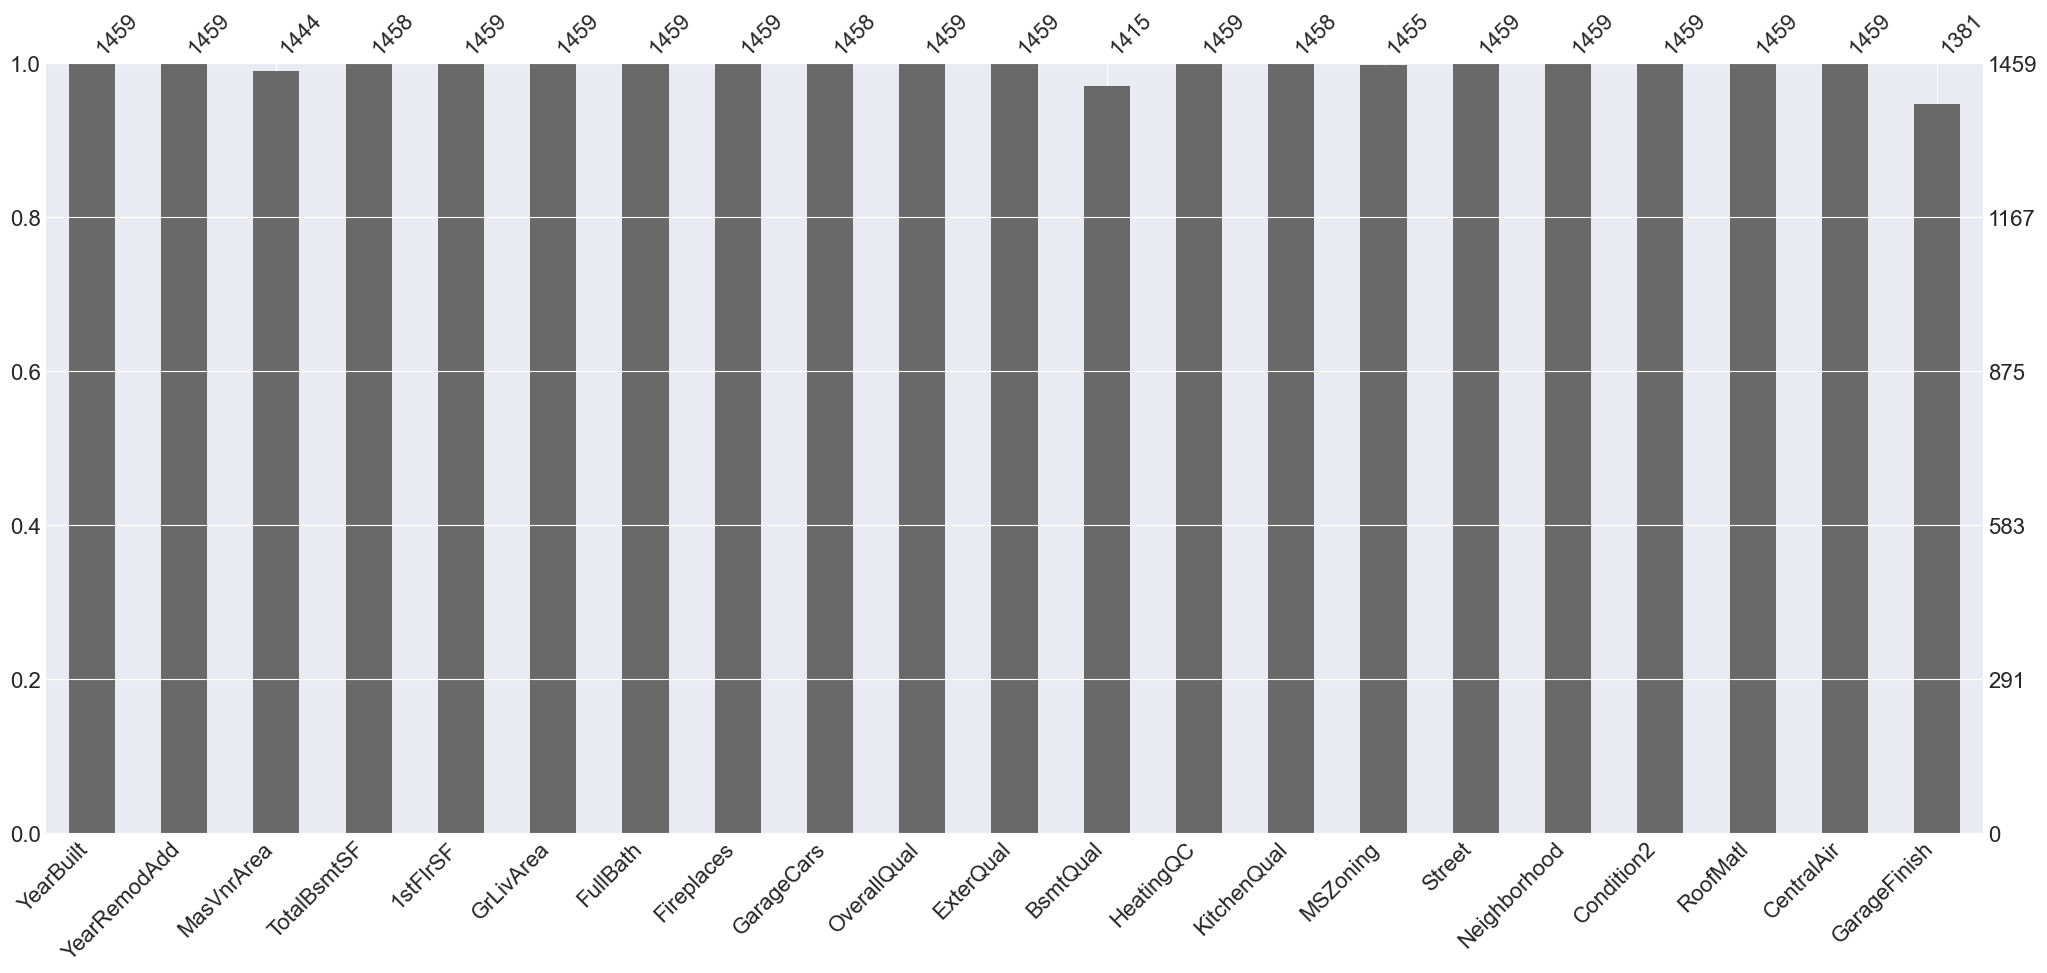

In [30]:
msno.bar(X_test)

In [31]:
od = ['OverallQual','ExterQual','BsmtQual','HeatingQC','KitchenQual']
enc = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po','NA']])
X_test[od] = X_test[od].fillna('NA')
X_test['ExterQual'] = enc.fit_transform(X_test.loc[:,['ExterQual']])
X_test['BsmtQual'] = enc.fit_transform(X_test.loc[:,['BsmtQual']])
X_test['HeatingQC'] = enc.fit_transform(X_test.loc[:,['HeatingQC']])
X_test['KitchenQual'] = enc.fit_transform(X_test.loc[:,['KitchenQual']])

C:\Users\malkhathery\AppData\Local\Temp\ipykernel_11200\1279545336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[od] = X_test[od].fillna('NA')
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_11200\1279545336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ExterQual'] = enc.fit_transform(X_test.loc[:,['ExterQual']])
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_11200\1279545336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [32]:
# one-hot encoding
X = pd.get_dummies(data=X, drop_first=True)
X_test= pd.get_dummies(data=X_test, drop_first=True)
X, X_test = X.align(X_test, join='left', axis=1)
X_test = X_test.fillna(int(0))
print(X.shape)
print(X_test.shape)

print(Y.shape)

(1094, 66)
(1459, 66)
(1094,)


In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YearBuilt             1459 non-null   float64
 1   YearRemodAdd          1459 non-null   float64
 2   MasVnrArea            1459 non-null   float64
 3   TotalBsmtSF           1459 non-null   float64
 4   1stFlrSF              1459 non-null   float64
 5   GrLivArea             1459 non-null   float64
 6   FullBath              1459 non-null   float64
 7   Fireplaces            1459 non-null   float64
 8   GarageCars            1459 non-null   float64
 9   OverallQual           1459 non-null   int64  
 10  ExterQual_Fa          1459 non-null   float64
 11  ExterQual_Gd          1459 non-null   float64
 12  ExterQual_TA          1459 non-null   float64
 13  BsmtQual_Fa           1459 non-null   float64
 14  BsmtQual_Gd           1459 non-null   float64
 15  BsmtQual_TA          

In [34]:
X.head()

,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,OverallQual,...,Condition2_RRNn,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,CentralAir_Y,GarageFinish_RFn,GarageFinish_Unf
0,0.981147,0.816592,0.452011,-0.585961,-0.820154,0.332721,0.76787,-0.964879,0.183292,7,...,0,1,0,0,0,0,0,1,1,0
1,0.115082,-0.473964,-0.576427,0.390796,0.227587,-0.519179,0.76787,0.615327,0.183292,6,...,0,1,0,0,0,0,0,1,1,0
2,0.916994,0.768794,0.273609,-0.431989,-0.654993,0.477240,0.76787,0.615327,0.183292,7,...,0,1,0,0,0,0,0,1,1,0
3,-1.841583,-0.760755,-0.576427,-0.826542,-0.549186,0.346032,-1.05042,0.615327,1.702390,7,...,0,1,0,0,0,0,0,1,0,1
4,0.884918,0.673197,1.260070,0.109317,-0.074348,1.260683,0.76787,0.615327,1.702390,8,...,0,1,0,0,0,0,0,1,1,0


In [35]:
X_test.head()

,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,OverallQual,...,Condition2_RRNn,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,CentralAir_Y,GarageFinish_RFn,GarageFinish_Unf
0,-0.366065,-1.190940,-0.576427,-0.523410,-0.716928,-1.215150,-1.05042,-0.964879,-1.335807,5,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
1,-0.462294,-1.334336,-0.009736,0.551985,0.400490,-0.391774,-1.05042,-0.964879,-1.335807,6,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
2,0.788688,0.577600,-0.576427,-0.412743,-0.634348,0.178695,0.76787,0.615327,0.183292,5,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
3,0.820765,0.577600,-0.471484,-0.417555,-0.639509,0.131156,0.76787,0.615327,0.183292,6,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
4,0.628306,0.290810,-0.576427,0.434101,0.274039,-0.484950,0.76787,-0.964879,0.183292,8,...,0.0,0.0,0.0,0.0,0,0,0,1,1,0


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import TransformedTargetRegressor

regressor = LinearRegression()

lr = TransformedTargetRegressor(
        regressor=regressor, 
        func=np.log, inverse_func=np.exp)

m = lr.fit(X,Y)
print(lr.score(X_test,Y_test))
print(lr.score(X,Y))
pred = m.predict(X_test)


-89.51009555195648
0.9083272409260305


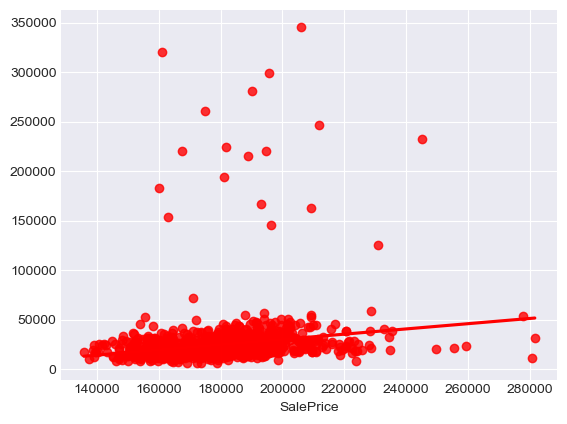

In [53]:
sns.regplot(x=Y_test,y=pred,ci=None,color ='red');

In [38]:
# lm = LinearRegression()
# model = lm.fit(X,Y)
# y_train_pred = model.predict(X)
# y_test_pred = model.predict(X_test)
# train_score = r2_score(Y, y_train_pred)
# test_score = r2_score(Y_test, y_test_pred)